# Decision Tree

Imports

In [16]:
import os
import sklearn
from sklearn import model_selection
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn import tree
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from sklearn.model_selection import GridSearchCV
from IPython.display import Image 
import pydotplus
import numpy as np
import pandas as pd

Some functions

In [11]:
# Function to create a tree diagram
def create_tree_graph_png(tree, feature_names):
    tree_str = export_graphviz(tree, feature_names=feature_names, filled=True, out_file=None)
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png('tree.png')
    return Image(graph.create_png())

def displaying_result(X, y, X_test, y_pred):
    plt.figure()
    plt.scatter(X, y, c="darkorange", label="data")
    plt.plot(X_test, y_pred, color="cornflowerblue", label="max_depth=2", linewidth=2)
    plt.xlabel("data")
    plt.ylabel("target")
    plt.title("Decision Tree Regression")
    plt.legend()
    plt.show()

Loading dataset

In [12]:
dataset = pd.read_csv("/Users/cha/Desktop/3A/code/ml-project/data/train_airbnb_berlin_cleaned.csv")

Train test split

In [13]:
columns = list(dataset.columns)
columns.remove('Price')
X = dataset[columns]
y = dataset['Price']

X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y,
    test_size=0.30,
    random_state=0
)
print(len(X_train), len(X_test))

10689 4581


In [14]:
pgrid = {
    "max_depth": range(4, 34),
    "min_samples_split": range(100, 1000, 100)
}
grid_search = GridSearchCV(
    tree.DecisionTreeRegressor(),
    param_grid=pgrid,
    scoring='neg_mean_squared_error',
    cv=10
)
grid_search.fit(X_train, y_train)
y_pred = grid_search.best_estimator_.predict(X_test)
print("MSE: ", mean_squared_error(y_test, y_pred))
print("max_depth: ", grid_search.best_params_)


MSE:  1688.583749512248
max_depth:  {'max_depth': 8, 'min_samples_split': 500}


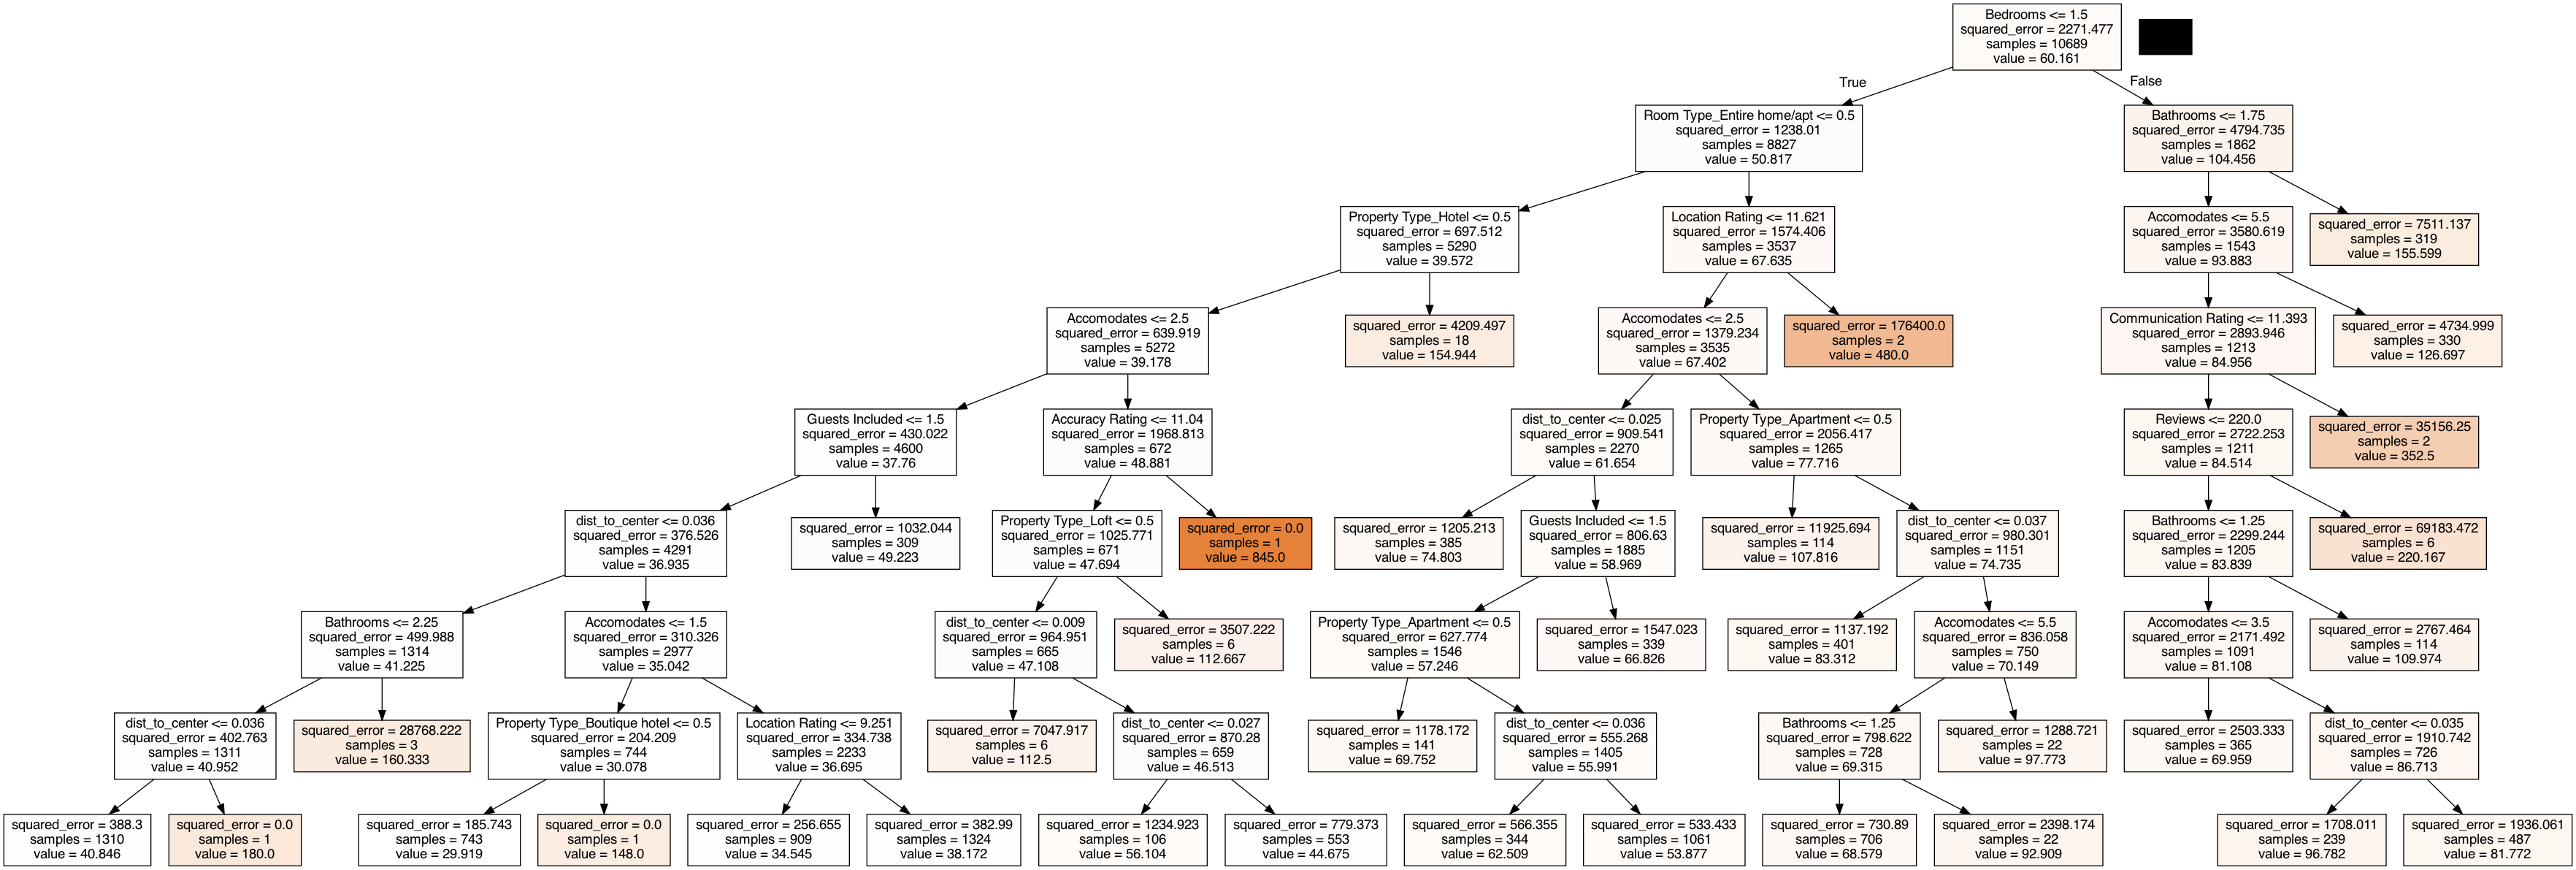

In [18]:
create_tree_graph_png(grid_search.best_estimator_, X_train.columns)